This Jupyter Notebook is meant to create the data visualization for our 3D Conceptual Risk-Scoring  Matrix Model, using Matplotlib with Python. 

Source/Credits: https://likegeeks.com/3d-plotting-in-python/

## Importing Libraries

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Creating Figure and Axis, and plotting the point(s)

<IPython.core.display.Javascript object>


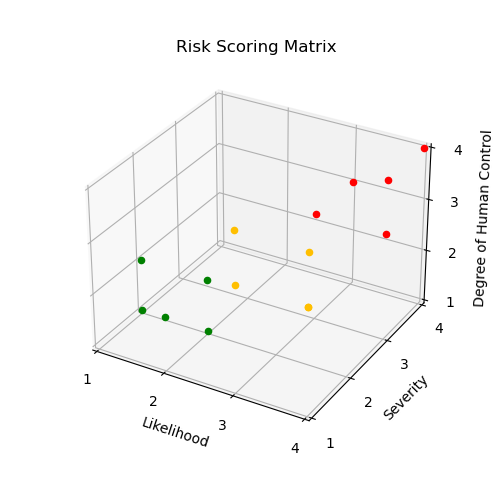

In [23]:
# Creating the empty figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Naming the figure & the axes 
ax.set_title("Risk Scoring Matrix")
ax.set_xlabel("Likelihood")
ax.set_ylabel("Severity")
ax.set_zlabel("Degree of Human Control")

# Setting the limits of each axes
ax.set_xlim(1,4)
ax.set_ylim(1,4)
ax.set_zlim(1,4)

# Setting the gridlines
ax.set_xticks([1,2,3,4])
ax.set_yticks([1,2,3,4])
ax.set_zticks([1,2,3,4])

# Plotting the points on the figure
# GREEN - Not likely, non severe, low deg 
ax.scatter(1,2,1, c='g')
ax.scatter(2,2,2, c='g') 
ax.scatter(2,1,2, c='g') 
ax.scatter(1,2,2, c='g') 
ax.scatter(2,2,1, c='g')
# AMBER - Likely, non severe, high deg
ax.scatter(4,1,4, c='#FFBF00') 
ax.scatter(3,1,4, c='#FFBF00') 
ax.scatter(4,1,3, c='#FFBF00') 
ax.scatter(4,1,3, c='#FFBF00') 
ax.scatter(3,1,3, c='#FFBF00') 
# RED - Likely, severe, high deg
ax.scatter(4,3,3, c='r') 
ax.scatter(3,4,3, c='r') 
ax.scatter(3,3,3, c='r') 
ax.scatter(4,3,4, c='r') 
ax.scatter(4,4,4, c='r')

plt.show()

Comments: 
1. [TO-DO] Colors for each points should be determined by certain logic (e.g. if vector values between (0,0,0) and (1,1,1) would be green etc)
2. [Good To Have] There should be some sort of annotations/labels when we over a data point 
3. Float values supported by points - i.e. points can very well be (1.2, 3.1, 3.7) instead of (1,3,4)


# Testing out

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("Consolidated_News_Articles_With_Sentiment_Labels.csv")

df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative


In [32]:
df['new_class_name'].unique()

array(['geophysical event', 'idiosyncratic', 'cyberattack',
       'Acute climatological event (cyclone)', 'pandemic',
       'Acute climatological event (droughts)', 'Economic Crisis',
       'Acute climatological event (flood)',
       'Acute climatological event (heat stress)', 'Man-Made Disaster',
       'Terrorism', 'Trade Dispute', 'Military Conflicts'], dtype=object)

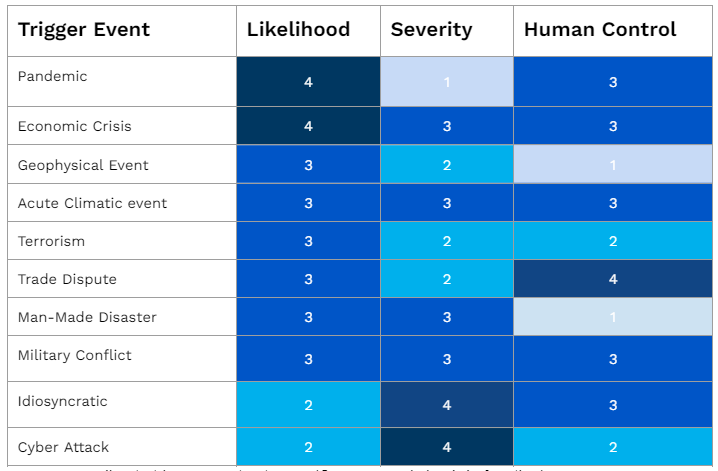

In [8]:
def create_likelihood_score(x):
    if x == 'idiosyncratic':
        return 2
    elif x == 'geophysical event':
        return 3
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 3
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 4
    elif x == 'pandemic':
        return 4
    elif x == 'Trade Dispute':
        return 3
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3
        

In [9]:
def create_severity_score(x):
    if x == 'idiosyncratic':
        return 4
    elif x == 'geophysical event':
        return 2
    elif x == 'cyberattack':
        return 4
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 1
    elif x == 'Trade Dispute':
        return 2
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3

In [11]:
def create_human_control_score(x):
    if x == 'idiosyncratic':
        return 3
    elif x == 'geophysical event':
        return 1
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 3
    elif x == 'Trade Dispute':
        return 4
    elif x == 'Man-Made Disaster':
        return 1
    else:
        return 3

In [12]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative


In [13]:
df['Likelihood Score'] = df['new_class_name'].apply(create_likelihood_score)

In [19]:
df["Likelihood Score"].value_counts()

3    9292
2    2437
4    2018
Name: Likelihood Score, dtype: int64

In [20]:
df['Severity Score'] = df['new_class_name'].apply(create_severity_score)

In [21]:
df['Human Control Score'] = df['new_class_name'].apply(create_human_control_score)

In [22]:
df.head()

,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2,sentiment score,compound score,sentiment label,Likelihood Score,Severity Score,Human Control Score
0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"['mumbai', 'reuters', 'himalayan', 'avalanche'...",mumbai reuters himalayan avalanche killed seve...,"{'neg': 0.148, 'neu': 0.773, 'pos': 0.079, 'co...",-0.7506,negative,3,2,1
1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"['zurich', 'reuters', 'one', 'person', 'killed...",zurich reuters one person killed four others i...,"{'neg': 0.276, 'neu': 0.63, 'pos': 0.094, 'com...",-0.9665,negative,3,2,1
2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"['vienna', 'reuters', 'avalanche', 'area', 'au...",vienna reuters avalanche area austria borderin...,"{'neg': 0.258, 'neu': 0.607, 'pos': 0.135, 'co...",-0.9100,negative,3,2,1
3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"['new', 'delhi', 'reuters', 'himalayan', 'aval...",new delhi reuters himalayan avalanche trapped ...,"{'neg': 0.045, 'neu': 0.782, 'pos': 0.172, 'co...",0.8225,positive,3,2,1
4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"['salt', 'lake', 'city', 'nytimes', 'four', 'b...",salt lake city nytimes four back country skier...,"{'neg': 0.258, 'neu': 0.703, 'pos': 0.039, 'co...",-0.9509,negative,3,2,1


# Creating the Cube

<IPython.core.display.Javascript object>


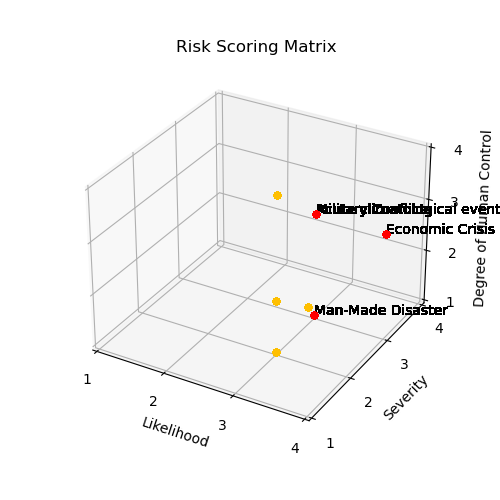

In [60]:
threedee = plt.figure(figsize=(5,5)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')


# for i in range(len(m)): #plot each point + it's index as text above
#     threedee.scatter(m[i,0],m[i,1],m[i,2],color='r') 
#     ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
#     color='k') 




for i in range(len(df)):
    likelihood_score = df["Likelihood Score"].loc[i]
    severity_score = df["Severity Score"].loc[i]
    human_control_score = df["Human Control Score"].loc[i]
    annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            if human_control_score <= 2:
                threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r')
            threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Matrix")
# Setting the limits of each axes
threedee.set_xlim(1,4)
threedee.set_ylim(1,4)
threedee.set_zlim(1,4)

# Setting the gridlines
threedee.set_xticks([1,2,3,4])
threedee.set_yticks([1,2,3,4])
threedee.set_zticks([1,2,3,4])

plt.show()

# Reference Codes

<IPython.core.display.Javascript object>


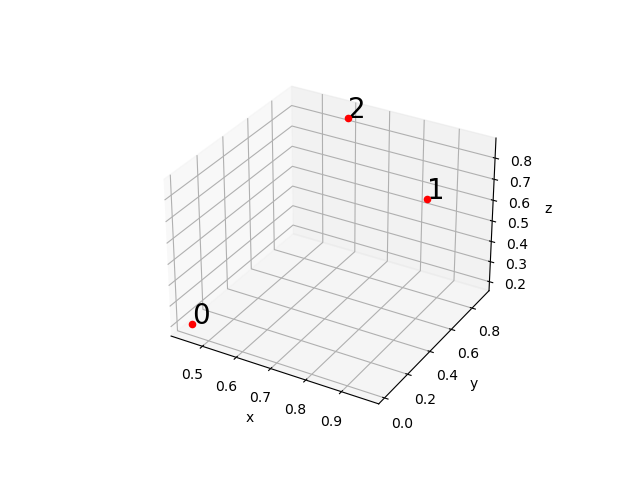

In [34]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

 
m=rand(3,3) # m is an array of (x,y,z) coordinate triplets
 
fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(m)): #plot each point + it's index as text above
    ax.scatter(m[i,0],m[i,1],m[i,2],color='r') 
    ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
    color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()